🔹 Dataset Shape: (569, 30)

🔹 Feature Preview:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius

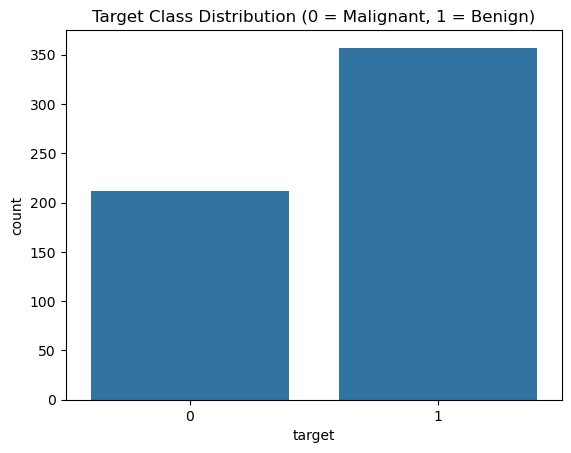

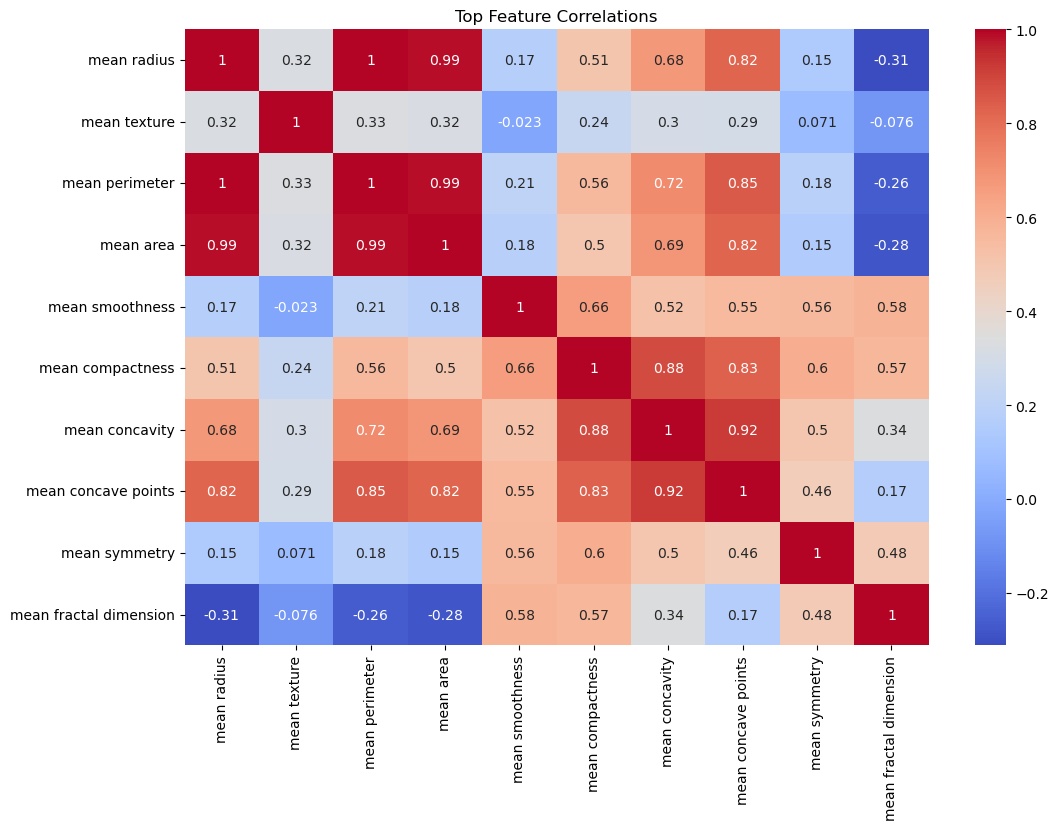

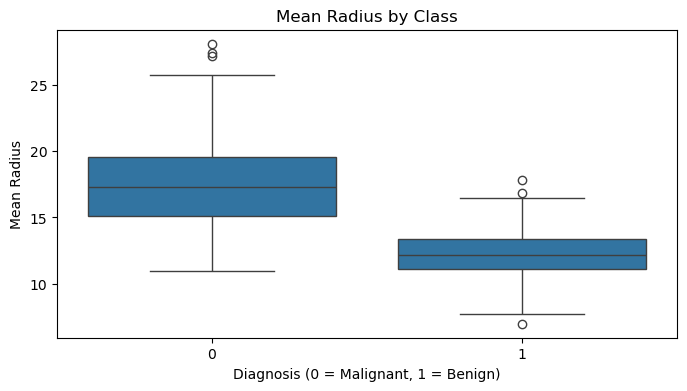


🔸 Logistic Regression
Accuracy : 0.9736842105263158
Precision: 0.9722222222222222
Recall   : 0.9859154929577465
F1 Score : 0.9790209790209791
ROC AUC  : 0.99737962659679

🔸 K-Nearest Neighbors
Accuracy : 0.9473684210526315
Precision: 0.9577464788732394
Recall   : 0.9577464788732394
F1 Score : 0.9577464788732394
ROC AUC  : 0.9819849328529315

🔸 SVM (Linear)
Accuracy : 0.956140350877193
Precision: 0.9714285714285714
Recall   : 0.9577464788732394
F1 Score : 0.9645390070921985
ROC AUC  : 0.9963969865705863

🔸 SVM (RBF)
Accuracy : 0.9824561403508771
Precision: 0.9726027397260274
Recall   : 1.0
F1 Score : 0.9861111111111112
ROC AUC  : 0.99737962659679

🔸 Decision Tree
Accuracy : 0.9298245614035088
Precision: 0.9436619718309859
Recall   : 0.9436619718309859
F1 Score : 0.9436619718309859
ROC AUC  : 0.9253193580085163

🔸 Random Forest
Accuracy : 0.9649122807017544
Precision: 0.958904109589041
Recall   : 0.9859154929577465
F1 Score : 0.9722222222222222
ROC AUC  : 0.99737962659679

🔸 Naive Bayes

In [7]:
# ============================ IMPORTS ============================ #
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ============================ LOAD DATA ============================ #
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

data = load_breast_cancer()
data.target
data.data
data.feature_names
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# ============================ EDA ============================ #
import matplotlib.pyplot as plt
import seaborn as sns

print("🔹 Dataset Shape:", X.shape)
print("\n🔹 Feature Preview:\n", X.head())

print("\n🔹 Missing Values:\n", X.isnull().sum().sum())

print("\n🔹 Target Distribution:\n", y.value_counts())
sns.countplot(x=y)
plt.title("Target Class Distribution (0 = Malignant, 1 = Benign)")
plt.show()

# Correlation Heatmap (Top Features)
plt.figure(figsize=(12, 8))
corr = X.corr()
top_corr_features = corr.index[0:10]
sns.heatmap(X[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title("Top Feature Correlations")
plt.show()

# Boxplot of a key feature by class
plt.figure(figsize=(8, 4))
sns.boxplot(x=y, y=X['mean radius'])
plt.title("Mean Radius by Class")
plt.xlabel("Diagnosis (0 = Malignant, 1 = Benign)")
plt.ylabel("Mean Radius")
plt.show()

# ============================ PREPROCESSING ============================ #
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ============================ LOGISTIC REGRESSION ============================ #
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("\n🔸 Logistic Regression")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall   :", recall_score(y_test, y_pred_log))
print("F1 Score :", f1_score(y_test, y_pred_log))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_log))

# ============================ KNN ============================ #
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("\n🔸 K-Nearest Neighbors")
print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall   :", recall_score(y_test, y_pred_knn))
print("F1 Score :", f1_score(y_test, y_pred_knn))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_knn))

# ============================ SVM LINEAR ============================ #
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)
y_prob_svm_linear = svm_linear.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("\n🔸 SVM (Linear)")
print("Accuracy :", accuracy_score(y_test, y_pred_svm_linear))
print("Precision:", precision_score(y_test, y_pred_svm_linear))
print("Recall   :", recall_score(y_test, y_pred_svm_linear))
print("F1 Score :", f1_score(y_test, y_pred_svm_linear))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_svm_linear))

# ============================ SVM RBF ============================ #
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)
y_prob_svm_rbf = svm_rbf.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("\n🔸 SVM (RBF)")
print("Accuracy :", accuracy_score(y_test, y_pred_svm_rbf))
print("Precision:", precision_score(y_test, y_pred_svm_rbf))
print("Recall   :", recall_score(y_test, y_pred_svm_rbf))
print("F1 Score :", f1_score(y_test, y_pred_svm_rbf))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_svm_rbf))

# ============================ DECISION TREE ============================ #
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("\n🔸 Decision Tree")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall   :", recall_score(y_test, y_pred_dt))
print("F1 Score :", f1_score(y_test, y_pred_dt))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_dt))

# ============================ RANDOM FOREST ============================ #
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("\n🔸 Random Forest")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1 Score :", f1_score(y_test, y_pred_rf))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_rf))

# ============================ NAIVE BAYES ============================ #
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("\n🔸 Naive Bayes")
print("Accuracy :", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall   :", recall_score(y_test, y_pred_nb))
print("F1 Score :", f1_score(y_test, y_pred_nb))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_nb))

# ============================ GRADIENT BOOSTING ============================ #
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("\n🔸 Gradient Boosting")
print("Accuracy :", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall   :", recall_score(y_test, y_pred_gb))
print("F1 Score :", f1_score(y_test, y_pred_gb))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_gb))

# ============================ XGBOOST ============================ #
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("\n🔸 XGBoost")
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall   :", recall_score(y_test, y_pred_xgb))
print("F1 Score :", f1_score(y_test, y_pred_xgb))
print("ROC AUC  :", roc_auc_score(y_test, y_prob_xgb))

In [1]:
# ============================ SAVE, LOAD, PREDICT (ONE CELL) ============================ #
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Step 1: Train model and scaler
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

# Step 2: Save model and scaler
joblib.dump(rf, "breast_cancer_rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Model and scaler saved.")

# Step 3: Load model and scaler
rf_loaded = joblib.load("breast_cancer_rf_model.pkl")
scaler_loaded = joblib.load("scaler.pkl")
print("✅ Model and scaler loaded.")

# Step 4: Predict on dummy input
dummy_input = np.array([[14.5, 20.0, 95.0, 600.0, 0.1, 0.2, 0.3, 0.1, 0.2, 0.07,
                         0.5, 1.0, 3.5, 45.0, 0.005, 0.02, 0.02, 0.01, 0.01, 0.002,
                         16.0, 30.0, 100.0, 800.0, 0.13, 0.3, 0.4, 0.15, 0.25, 0.09]])

dummy_scaled = scaler_loaded.transform(dummy_input)
print(dummy_scaled)
prediction = rf_loaded.predict(dummy_scaled)
proba = rf_loaded.predict_proba(dummy_scaled)

print("\n🔍 Prediction:", "Benign (1)" if prediction[0] == 1 else "Malignant (0)")
print("📊 Probability [Malignant, Benign]:", proba[0])

✅ Model and scaler saved.
✅ Model and scaler loaded.
[[ 0.10825953  0.19124782  0.12832771 -0.15336944  0.30601599  1.8388766
   2.65936635  1.36039897  0.68839495  1.00575492  0.34641799 -0.37454714
   0.31018264  0.1044562  -0.65141374 -0.30320447 -0.39936388 -0.30123815
  -1.29530266 -0.65388314 -0.04891894  0.73687417 -0.213064   -0.13576794
  -0.06644939  0.30519907  0.59954445  0.54889564 -0.64205841  0.34395664]]

🔍 Prediction: Malignant (0)
📊 Probability [Malignant, Benign]: [0.66 0.34]


In [6]:
# ============================ SAVE, LOAD, PREDICT USING PICKLE ============================ #
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Step 1: Train model and scaler
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

# Step 2: Save model and scaler using pickle
with open("breast_cancer_rf_model.pkl", "wb") as f_model:
    pickle.dump(rf, f_model)

with open("scaler.pkl", "wb") as f_scaler:
    pickle.dump(scaler, f_scaler)

print("✅ Model and scaler saved using pickle.")

# Step 3: Load model and scaler
with open("breast_cancer_rf_model.pkl", "rb") as f_model:
    rf_loaded = pickle.load(f_model)

with open("scaler.pkl", "rb") as f_scaler:
    scaler_loaded = pickle.load(f_scaler)

print("✅ Model and scaler loaded successfully.")

# Step 4: Predict on dummy input
dummy_input = np.array([[14.5, 20.0, 95.0, 600.0, 0.1, 0.2, 0.3, 0.1, 0.2, 0.07,
                         0.5, 1.0, 3.5, 45.0, 0.005, 0.02, 0.02, 0.01, 0.01, 0.002,
                         16.0, 30.0, 100.0, 800.0, 0.13, 0.3, 0.4, 0.15, 0.25, 0.09]])

dummy_scaled = scaler_loaded.transform(dummy_input)
prediction = rf_loaded.predict(dummy_scaled)
proba = rf_loaded.predict_proba(dummy_scaled)

print("\n🔍 Prediction:", "Benign (1)" if prediction[0] == 1 else "Malignant (0)")
print("📊 Probability [Malignant, Benign]:", proba[0])

✅ Model and scaler saved using pickle.
✅ Model and scaler loaded successfully.

🔍 Prediction: Malignant (0)
📊 Probability [Malignant, Benign]: [0.65 0.35]
